<h2 align='center'>🧠 Intro to Deep Learning 2 - Loss Functions, Optimzers, Underfitting and Overfitting</h2>
<br />
<i><center>Adding knowledges to our models</center></i>

----

👋 What's shaking, bacon? In the previous notebook we learned how to create simple Sequential Deep Learning models, how to attach Activation Funtions to them and how to convert Deep Learning Diagrams into Python Code. In this one, we will learn how to add knowledge and improve it with Loss Functions and Optimizers, as far as avoiding Underfitting and Overfitting. Let's go!

> Topics:

```
- Loss Functions;
- Optimizers;
- Underfitting;
- Overfitting.
```

----

<h2>0) Loss Functions</h2>

When we talk about giving knowledge to a Deep Learning model, we are talking about giving the model the ability to change its `weights` and `bias`, nothing more and nothing less. Having this in mind, the first step to this is to give the model a `metric` to measure how well is its current knowledge, evaluate it and settle whether the weights and bias will be or not updated. For this task, we take on `Loss Functions`.

`Loss Functions` are functions that compare the outputs generated by the model with the real outputs observed in the dataset. If the difference between them is high, the function tells the model to adjust its weights and bias, else the weights and bias keep the same.

Nowadays, there a considerable number of Loss Functions for the most variable problems, so, for this notebook, we will see the main three ones used to solve Regression Problems: `Mean Absolute Error (MAE)`, `Mean Squared Error (MSE)` and `Huber Loss Function`. Let's go deeper into each one!!

----

<b>- Mean Absolute Error (MAE)</b>

`MAE` calculates the sum of the absolute value of the difference between the predicted output and the real one. After that, divides the result by the total number of predictions. Equation:

```python
MAE = sum(abs(predicted_y - real_y)) / number_of_predictions
```

$$ MAE = \frac{\sum\limits_{i=1}^{n} \left| \hat{y_i} - y_i \right|}{n} $$

<br />

----

<b>- Mean Squared Error (MSE)</b>

`MSE` calculates the sum of the squared of the difference between the predicted output and the real one. After that, divides the result by the total number of predictions. It's quite similar to MAE, the difference is replacing the absolute operation to the power 2. Equation:

```python
MSE = sum((predicted_y - real_y)**2) / number_of_predictions
```

$$ MSE = \frac{\sum\limits_{i=1}^{n} \left( \hat{y_i} - y_i \right)^2}{n} $$


<br />

<b>- Huber Loss Function</b>

`Huber Loss Function` has two equation depending to the sum of the absolute difference between all predicted outputs and the real ones compared to the outputs standard deviation (*std*). Being:

> for sum(abs(predicted_y - real_y)) <= std: calculates the sum of 1/2 times the squared of the difference between the predicted output and the real one. After that, divides the result by the total number of predictions.

```python
Huber Loss = sum(1/2 * (predicted_y - real_y)**2) / number_of_predictions
```

$$Huber\ Loss = \frac{\sum\limits_{i=1}^{n} \frac{1}{2} (y_i - \hat{y_i})^2}{n}$$



> for sum(abs(predicted_y - real_y)) > std: calculates the sum of standard deviation times the absolute difference between the predicted output and the real one minus 1/2 times the standard deviation. After that, divides the result by the total number of predictions.

```python
Huber Loss = sum(std * (abs(predicted_y - real_y) - 1/2 * std)) / number_of_predictions
```

$$Huber\ Loss = \frac{\sum\limits_{i=1}^{n} std \cdot \left(|y_i - \hat{y_i}| - \frac{1}{2}std \right)}{n}$$

OBS.: observing the equations for a certain time, it hit you that the Huber Loss combines MAE and MSE, using the first one to the first case, and second one to the second case.

----

Looking at this "*monstruos*" equations, you may be like: "*What the hell is this? And how am I supposed to memorize them all and know when to use each one?*". Don't worry!! The good news is that you don't have to memorize the equation, only knowing what they're and what they do is enough. Now, about when to use them, here's a cheatsheet for ya!

```
- Mean Absolute Error (MAE) and Huber Loss: best when your model can make significant errors, like a Deep Learning Model that predicts house prices and the final user always check out the predicted price before takin an action.

- Mean Absolute Error (MSE): best when you want to avoid the probability of getting significant errors, like a Deep Learning Model that predicts stock prices and the final user can get huge losses when a prediction goes wrong.
```

----

<h2>1) Optimizers</h2>

While Loss Functions evaluate our model results and tell it whether the weights and bias must or not be updated, `Optimizers` tell the model HOW to update them!

To this task, the Optimizers split up the dataset into `batches` and processes them multiple times in cycles called `epochs`. Each epoch corresponds to a training step using all the dataset batches and, also after each epoch, the weights and bias are updated if the Loss Functions say so. This loop goes on untill all defined number of epochs are done.

----

The Optimizers main goal, in a nutshell, is to `minimize the loss` and improve the fitted predicted line of the outputs to the best match, at the same time, reach a point where the weights and bias keep approximely the same after each update.

![image.png](https://storage.googleapis.com/kaggle-media/learn/images/rFI1tIk.gif)

The image above shows an animation that after each update on the fitted predicted line of the outputs, the loss decreases and the weights and bias goes a step further to the perfect match!

----

Other thing to have in mind is the `Learning Rate`. It's a measurement that helps the Optimizers measure each weights and bias update, that is: when the update is higher than the learning rate, we can say that the model is learning something new, else, we can say that the model is not learning anymore.

I know that all of this are new information for you and it can be confusion at the first read, but don't worry, take your time, read as many times you need and do it to understand the content rather than to memorize it.

Oh! and I have more great news for ya! In this notebook we will be using one of the best Optimizer that can solve the majority problems, the `Adam Optimizer`. With this one, we don't need to especify the Learning Rate, due to its ability to find the best one for our model, cool, isn't it?

----

Yeah my friend, and you thought that you would spend more time programming here right? You're not wrong, after you get all the basic contents, you'll have your whole time to program, oh, and talking about programming time, we are gonna see how to create a Deep Learning model and assign it a Loss Function and an Optimizer!

In [32]:
# ---- Importing Libraries and Creating the Model ----

# pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # hidden layers >> ReLU as Activation Function
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    
    # output layer >> Linar as Activation Function
    layers.Dense(1)
])

In [33]:
# ---- Adding a Loss Function and an Optimizer ----
model.compile(optimizer='adam', loss='mse')

In [34]:
# ---- Displaying a Summary of our Model ----
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               6144      
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 1)                 513       
                                                                 
Total params: 531,969
Trainable params: 531,969
Non-trainable params: 0
_________________________________________________________________


Our model has `531,969` parameters, yes, this simple model has a half million parameters. Now you can understand why some AI Companies says that their models have millions of params!

Now, let's read the `red_wine.csv` dataset located at `datasets` folder, train our model with it and display the loss plot!

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Reading Dataset ----
red_wine = pd.read_csv('../datasets/red-wine.csv')

# ---- Create Training and Validation Splits ----
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# ---- Scaling to [0, 1] ----
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# ---- Split Features and Target ----
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

# ---- Displaying Dataset Info and Head ----
print(f'# of Rows: {df_train.shape[0]}')
print(f'# of Columns: {df_train.shape[1]}')
print('----')
df_train.head()

# of Rows: 1119
# of Columns: 12
----


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231,0.6
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615,0.4
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692,0.8
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154,0.6
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692,0.4


In [13]:
# ---- Training the Model ----
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 2s 51ms/step - loss: 0.1226 - val_loss: 0.0295
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0328 - val_loss: 0.0331
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0245 - val_loss: 0.0275
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0258 - val_loss: 0.0239
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0230 - val_loss: 0.0199
Epoch 6/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0206 - val_loss: 0.0187
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0196 - val_loss: 0.0194
Epoch 8/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0191 - val_loss: 0.0177
Epoch 9/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0187 - val_loss: 0.0185
Epoch 10/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0181 - val_loss: 0.0171


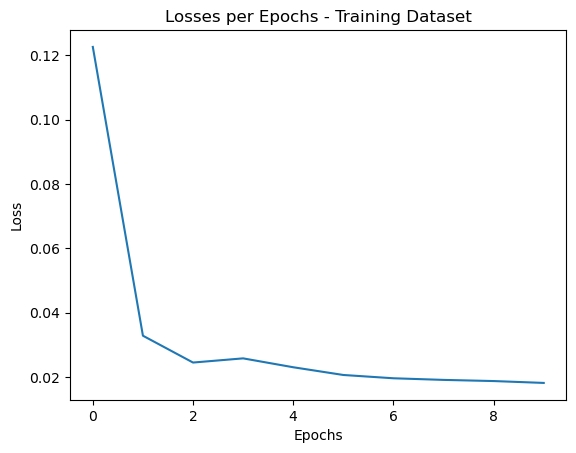

In [19]:
# ---- Plotting the Training Loss ----
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()

plt.title('Losses per Epochs - Training Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show();

Realize that as more epochs the model trains, the lower is the loss. Besides, observe that the Learning Rate between the 6th and the 8th epochs are kind of similar, so it wouldn't have problem if our model stopped training afteer the 6th epoch, in reality, it would even be perfect, because it could decrease the odds for overfitting - the topic we will cover now together underfitting.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               6144      
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 1)                 513       
                                                                 
Total params: 531,969
Trainable params: 531,969
Non-trainable params: 0
_________________________________________________________________
